In [16]:
import pandas as pd
import matplotlib.pyplot as plt

#resize charts to fit screen
plt.rcParams['figure.figsize']=[15,5]

"Date, Time, Open, High, Low, Close, Volume" 순서로 되어있는 USOUSD MetaTrader 4 Export 데이터를 로드한다.
데이터 내용 예> 2018.07.24,13:30,68.046,68.105,67.900,67.930,591

In [8]:
csv_data_uri = 'https://raw.githubusercontent.com/flowtide/dataframe_meets_financial_data/master/raw/forex/USOUSD30-18_19.csv'
df = pd.read_csv(data_uri, delimiter=',', names = ['date', 'time', 'open', 'high', 'low', 'close', 'volume'])
print(df.head())

         date   time    open    high     low   close  volume
0  2018.07.24  13:30  68.046  68.105  67.900  67.930     591
1  2018.07.24  14:00  67.937  67.979  67.829  67.837     762
2  2018.07.24  14:30  67.844  68.018  67.844  68.009     699
3  2018.07.24  15:00  68.011  68.137  67.942  68.067     866
4  2018.07.24  15:30  68.068  68.068  67.608  67.609    1870


In [6]:
# date, time 컬럼 데이터 타입 확인
df[['date','time']].dtypes

date    object
time    object
dtype: object

Date, Time 필드를 합쳐서 날짜로 만들고 이 컬럼을 index 컬럼으로 로드하는 방법

In [10]:
df = pd.read_csv(csv_data_uri
                 , names=['date', 'time', 'open', 'high', 'low', 'close', 'volume']
                 , parse_dates=[['date', 'time']] # date와 time 컬럼이 합쳐져 날짜로 파싱되고 이름이 date_time 컬럼명이 됨
                 , index_col='date_time'
                )
df.head()

,open,high,low,close,volume
date_time,,,,,
2018-07-24 13:30:00,68.046,68.105,67.900,67.930,591
2018-07-24 14:00:00,67.937,67.979,67.829,67.837,762
2018-07-24 14:30:00,67.844,68.018,67.844,68.009,699
2018-07-24 15:00:00,68.011,68.137,67.942,68.067,866
2018-07-24 15:30:00,68.068,68.068,67.608,67.609,1870


In [11]:
df.describe()

,open,high,low,close,volume
count,9851.000000,9851.000000,9851.000000,9851.000000,9851.000000
mean,60.828180,60.932991,60.716094,60.826370,963.197137
std,7.530683,7.512812,7.547910,7.530935,945.335874
min,42.522000,42.749000,42.416000,42.500000,1.000000
25%,54.056500,54.194500,53.922000,54.054500,298.000000
50%,61.531000,61.653000,61.408000,61.529000,654.000000
75%,67.481000,67.595000,67.385000,67.481000,1302.000000
max,76.547000,76.777000,76.194000,76.547000,7854.000000


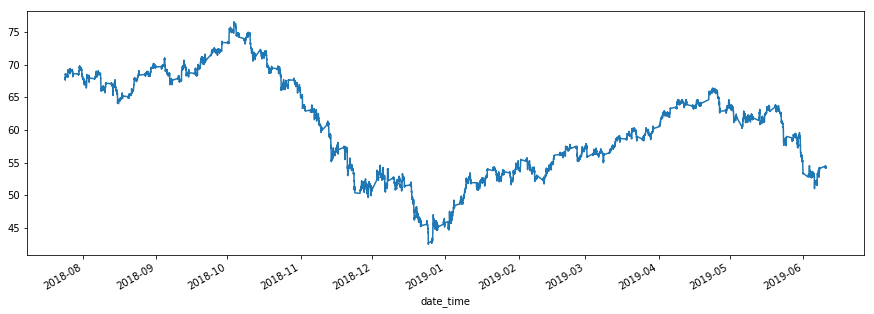

In [17]:
# 종가 그래프 그림
df['close'].plot()